In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Data path for train and test
X_path = '/content/drive/MyDrive/Cozii/ieee-fraud-detection-processed-data/X_resampled.csv'
y_path = '/content/drive/MyDrive/Cozii/ieee-fraud-detection-processed-data/y_resampled.csv'

In [ ]:
# Load data
X = pd.read_csv(X_path)
y = pd.read_csv(y_path)

In [ ]:
# Split data into train and test sets with 80% tranining and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
del X
del y

In [ ]:
# Ensure y is a 1D array by accessing the values of the 'isFraud' column
y_train = y_train['isFraud'].values.ravel() # Access 'isFraud' column and convert to NumPy array
y_test = y_test['isFraud'].values.ravel()   # Access 'isFraud' column and convert to NumPy array

In [ ]:
# Initialize Logistic Regression model with class weighting
model = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

# Train the model
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for AUC-ROC

In [ ]:
# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7259323275616251
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.74    113976
           1       0.76      0.66      0.71    113975

    accuracy                           0.73    227951
   macro avg       0.73      0.73      0.72    227951
weighted avg       0.73      0.73      0.72    227951



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Print results
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Model Performance Metrics:
Accuracy: 0.7259
Precision: 0.7627
Recall: 0.6559
F1-Score: 0.7053
AUC-ROC: 0.7909


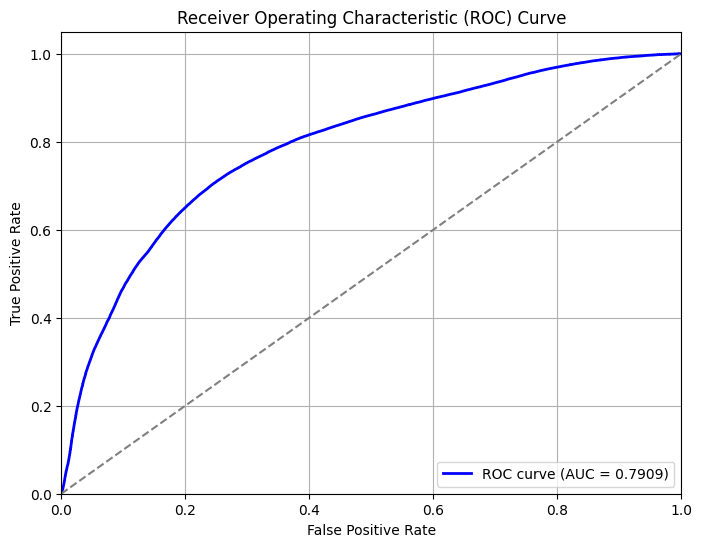

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line (random guessing)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()